In [42]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs, make_circles, load_iris
from sklearn.model_selection import train_test_split

import numpy as np

import matplotlib.pyplot as plt

import mglearn

In [14]:
X, y = make_circles(noise=.25, factor=.5, random_state=1)

y_named = np.array(['blue', 'red'])[y]

X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
train_test_split(
    X, y_named,
    y,
    random_state=0
)

clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train_named)

print(f'X_test shape: {X_test.shape}')
print(f'Decision func shape: {clf.decision_function(X_test).shape}')

X_test shape: (25, 2)
Decision func shape: (25,)


In [17]:
print(f'Decision func: {clf.decision_function(X_test)}\n\n')
print(f'Decision func with cond: {clf.decision_function(X_test) > 0}')

Decision func: [ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081
 -7.69097179  4.11001686  1.10753937  3.40782222 -6.46255955  4.28986642
  3.90156346 -1.20031247  3.66166081 -4.17231157 -1.23010079 -3.91576223
  4.03602783  4.11001686  4.11001686  0.65709014  2.69826265 -2.65673274
 -1.86776596]


Decision func with cond: [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]


In [18]:
print(f'Predictions: {clf.predict(X_test)}')

Predictions: ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [22]:
greater_zero = (clf.decision_function(X_test) > 0).astype(int)
predictions = clf.classes_[greater_zero]

print(greater_zero)
print(predictions)

[1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0]
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [25]:
print(f'Min: {np.min(clf.decision_function(X_test))}')
print(f'Max: {np.max(clf.decision_function(X_test))}')

Min: -7.690971785101899
Max: 4.289866423997604


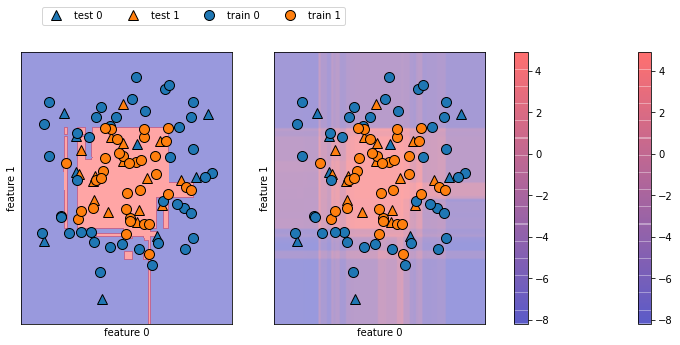

In [29]:
c

In [30]:
print(f'probs shape: {clf.predict_proba(X_test).shape}')

probs shape: (25, 2)


In [31]:
clf.predict_proba(X_test)

array([[1.57362639e-02, 9.84263736e-01],
       [8.45756526e-01, 1.54243474e-01],
       [9.81128693e-01, 1.88713075e-02],
       [9.74070327e-01, 2.59296728e-02],
       [1.35214212e-02, 9.86478579e-01],
       [2.50463747e-02, 9.74953625e-01],
       [9.99543275e-01, 4.56725221e-04],
       [1.61426376e-02, 9.83857362e-01],
       [2.48329911e-01, 7.51670089e-01],
       [3.20518935e-02, 9.67948107e-01],
       [9.98441637e-01, 1.55836338e-03],
       [1.35214212e-02, 9.86478579e-01],
       [1.98099245e-02, 9.80190075e-01],
       [7.68580365e-01, 2.31419635e-01],
       [2.50463747e-02, 9.74953625e-01],
       [9.84817480e-01, 1.51825198e-02],
       [7.73836215e-01, 2.26163785e-01],
       [9.80463909e-01, 1.95360915e-02],
       [1.73607896e-02, 9.82639210e-01],
       [1.61426376e-02, 9.83857362e-01],
       [1.61426376e-02, 9.83857362e-01],
       [3.41393574e-01, 6.58606426e-01],
       [6.30759509e-02, 9.36924049e-01],
       [9.34424749e-01, 6.55752512e-02],
       [8.661995

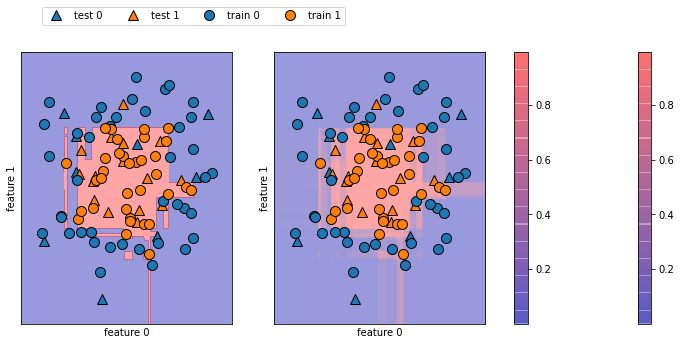

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(
    clf, X,
    ax=axes[0],
    alpha=.4,
    fill=True,
    cm=mglearn.cm2
)

scores = mglearn.tools.plot_2d_scores(
    clf, X,
    ax=axes[1],
    alpha=.4,
    cm=mglearn.ReBl,
    function='predict_proba'
)

for ax in axes:
    mglearn.discrete_scatter(
        X_test[:, 0], X_test[:, 1], y_test,
        markers='^',
        ax=ax
    )
    
    mglearn.discrete_scatter(
        X_train[:, 0], X_train[:, 1], y_train,
        markers='o',
        ax=ax
    )
    
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
    
    cbar = plt.colorbar(scores, ax=axes.tolist())
    
    axes[0].legend(
        ['test 0', 'test 1', 'train 0', 'train 1'],
        ncol=4,
        loc=(.1, 1.1)
    )

In [34]:
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42
)

clf = GradientBoostingClassifier(learning_rate=.01, random_state=0)
clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [38]:
print(f'Decision func shape: {clf.decision_function(X_test).shape}\n\n')
print(f'Decision func: {clf.decision_function(X_test)}\n\n')
print(f'Argmax: {np.argmax(clf.decision_function(X_test), axis=1)}')

Decision func shape: (38, 3)


Decision func: [[-1.995715    0.04758267 -1.92720695]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99058203 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99730159 -0.13469108 -1.20341483]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99677434 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99677434 -1.87637861  0.07863156]
 [ 0.06146394 -1.90755736 -1.92793758]
 [ 0.06146394 -1.90755736 -1.92793758]
 [ 0.06146394 -1.90755736 -1.92793758]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99087515 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99087515 -1.87637861  0.09686725]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99730159 -1.86429671  0.04166049]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99087515 -1.87637861  0.09686725]
 [-1.99087515 -1.8

In [39]:
clf.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [40]:
clf.predict_proba(X_test)

array([[0.10217718, 0.78840034, 0.10942248],
       [0.78347147, 0.10936745, 0.10716108],
       [0.09818072, 0.11005864, 0.79176065],
       [0.10217718, 0.78840034, 0.10942248],
       [0.10360005, 0.66723901, 0.22916094],
       [0.78347147, 0.10936745, 0.10716108],
       [0.10217718, 0.78840034, 0.10942248],
       [0.09763381, 0.11012538, 0.79224081],
       [0.10217718, 0.78840034, 0.10942248],
       [0.10217718, 0.78840034, 0.10942248],
       [0.09905185, 0.11172485, 0.78922331],
       [0.78347147, 0.10936745, 0.10716108],
       [0.78347147, 0.10936745, 0.10716108],
       [0.78347147, 0.10936745, 0.10716108],
       [0.78347147, 0.10936745, 0.10716108],
       [0.10217718, 0.78840034, 0.10942248],
       [0.09815477, 0.1100618 , 0.79178343],
       [0.10217718, 0.78840034, 0.10942248],
       [0.10217718, 0.78840034, 0.10942248],
       [0.09815477, 0.1100618 , 0.79178343],
       [0.78347147, 0.10936745, 0.10716108],
       [0.10178234, 0.11626145, 0.78195621],
       [0.

In [41]:
clf.predict_proba(X_test).sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

In [45]:
lr = LogisticRegression(max_iter=100000)

named_target = iris.target_names[y_train]
lr.fit(X_train, named_target)

LogisticRegression(max_iter=100000)

In [46]:
lr.classes_

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [47]:
lr.predict(X_test)

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa'], dtype='<U10')

In [48]:
lr.decision_function(X_test)

array([[ -3.03582124,   2.29472266,   0.74109859],
       [  5.91925033,   3.09153578,  -9.01078611],
       [-10.05356953,   1.87524031,   8.17832922],
       [ -2.73350524,   2.03660947,   0.69689577],
       [ -3.73816549,   2.47599736,   1.26216813],
       [  6.03605862,   3.03477772,  -9.07083634],
       [ -0.28277183,   2.17705724,  -1.89428541],
       [ -5.08533353,   1.70805205,   3.37728148],
       [ -3.45538957,   2.35265577,   1.1027338 ],
       [ -1.14579634,   2.34766512,  -1.20186878],
       [ -4.542649  ,   1.69766183,   2.84498717],
       [  6.429769  ,   3.10038715,  -9.53015615],
       [  6.75203922,   3.24365624,  -9.99569545],
       [  6.24967943,   3.09796397,  -9.3476434 ],
       [  6.6191887 ,   2.83484895,  -9.45403765],
       [ -3.04693091,   1.94652552,   1.1004054 ],
       [ -6.55532445,   1.46217378,   5.09315067],
       [ -1.15361038,   2.38295938,  -1.229349  ],
       [ -2.51207039,   2.06450146,   0.44756893],
       [ -6.23408474,   1.51696

In [49]:
np.argmax(lr.decision_function(X_test), axis=1)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [50]:
lr.classes_[np.argmax(lr.decision_function(X_test), axis=1)]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa'], dtype='<U10')